# 01 - Simple Linear Regression applied to Real Estate 🏡 

___

<img src="https://marshfinancialadvice.com.au/wp-content/uploads/2018/10/mortgages_80.jpg" />

Photo by [Breno Assis](https://unsplash.com/@brenoassis)

___

In this exercice, you will be introduced to Machine Learning applied to continuous data various by playing with a small and simple dataset 🏡

We will study and fit a **linear regression**, which is the most straigthforward algorithm in regression, and we will discuss performance of the model.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Q1.** Load in a Pandas DataFrame the dataset `house_small.csv` located in `data/house_pricing` directory.

> ⚠️ **Warning**: In our file, values are separated by ";" this time - as opposed to "," as usual.

In [236]:
# TODO - Load data
house_df = pd.read_csv('house_small.csv', delimiter= ';')
house_df

,price,surface,arrondissement
0,1827.0,44.10,1.0
1,1759.0,42.00,1.0
2,1903.0,54.00,1.0
3,1941.0,46.00,1.0
4,1950.0,48.00,1.0
...,...,...,...
821,849.0,36.00,10.0
822,704.0,8.00,10.0
823,1281.0,37.00,10.0
824,1552.0,64.00,10.0


**Q2.** Quickly explore the data
- How many data points does the dataset contain?
- How many features exist and which are they ?
- Describe briefly the data

In [237]:
# TODO - Get number of data points and number of features
house_df.shape

(826, 3)

In [238]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           825 non-null    float64
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(3)
memory usage: 19.5 KB


In [239]:
house_df.describe()

,price,surface,arrondissement
count,825.000000,822.000000,822.000000
mean,2007.672727,58.106752,4.142336
std,1892.158336,44.886441,3.202151
min,395.000000,8.000000,1.000000
25%,1056.000000,28.625000,2.000000
50%,1570.000000,46.000000,3.000000
75%,2343.000000,72.460000,4.000000
max,25002.000000,412.000000,10.000000


In [240]:
# TODO - Describe data

The dataset contains 826 entries that correspond to appartment, with 3 variables : the price of the appartment, its surface and the arrondissement in which it is. There are 10 different arrondissement (1 to 10), there are 4 appartments without surface and 4 without district (maybe the same).

**Q3.**
- Do you have any missing values? If yes, remove the associated rows.
- Visualize the data on a scatter plot. Is there any outlier(s)? If yes, remove them.
- Do you observe any correlation between variables? You can for example use the magic function `sns.pairplot` or also `pd.plotting.scatter_matrix(df)`

In [241]:
# TODO - Remove N/A
house_df.isna().sum()

price             1
surface           4
arrondissement    4
dtype: int64

In [242]:
house_df = house_df.dropna(axis = 0)

In [243]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           822 non-null    float64
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(3)
memory usage: 25.7 KB


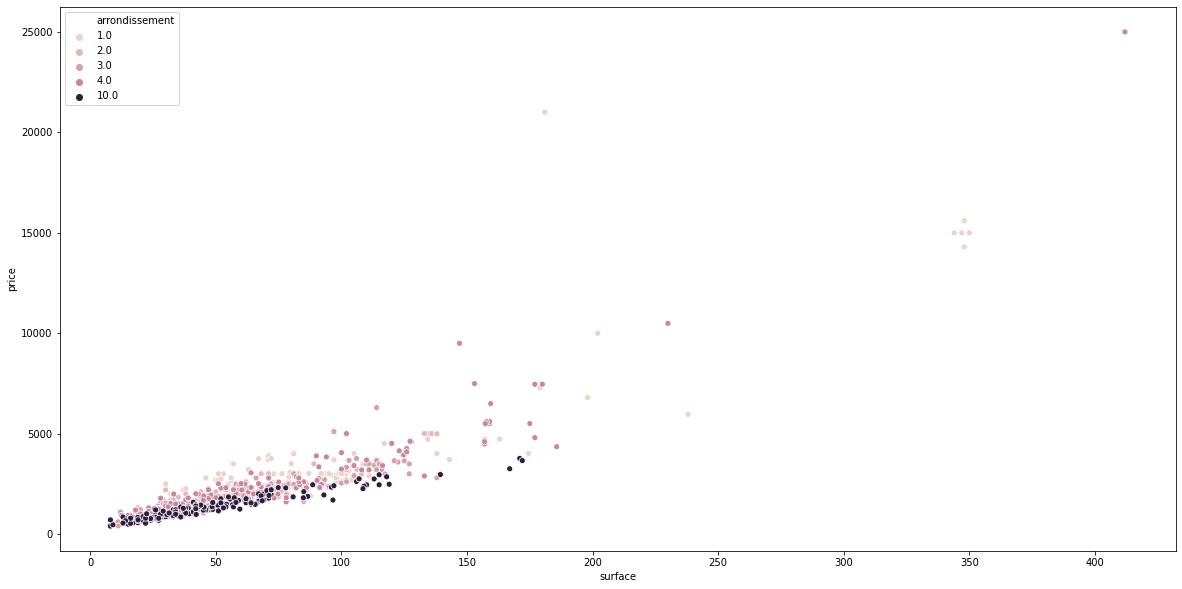

In [244]:
# TODO - Visualize the data
plt.figure(figsize=(20,10))

sns.scatterplot(x='surface', y='price', data = house_df, hue = 'arrondissement', legend = 'full')

plt.show()

In [245]:
# TODO - Visualize the data
house_df["price_per_surface"] = house_df.price / house_df.surface

/home/guillaume/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



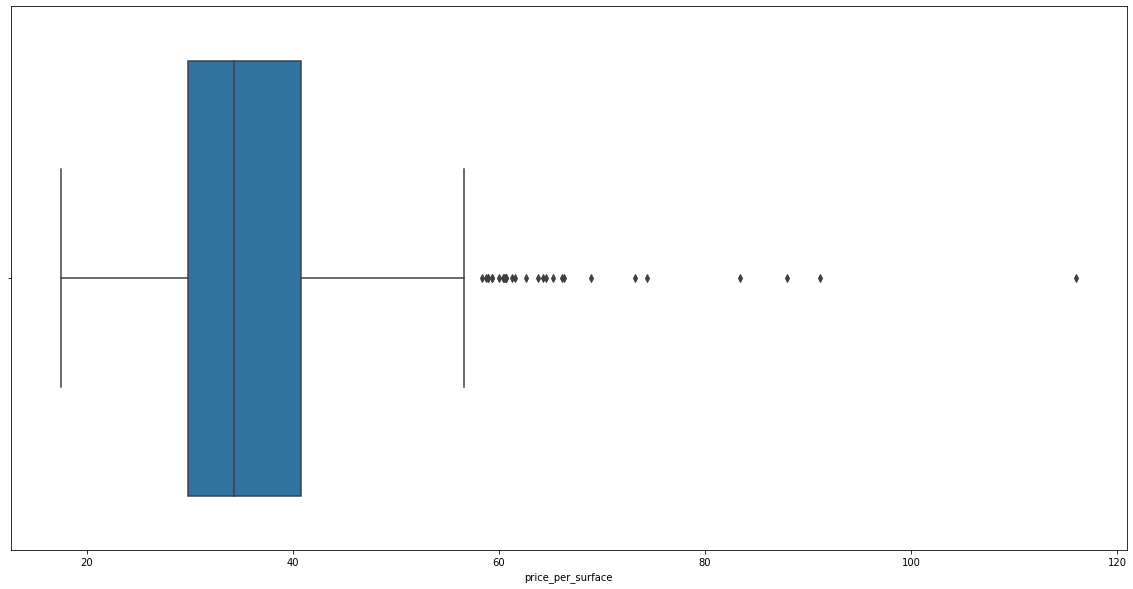

In [246]:
plt.figure(figsize=(20,10))

sns.boxplot(house_df['price_per_surface'])

plt.show()

In [247]:
# TODO - Remove outliers
house_df = house_df[house_df['price_per_surface']<60].drop('price_per_surface', axis = 1)

In [248]:
house_df

,price,surface,arrondissement
0,1827.0,44.10,1.0
1,1759.0,42.00,1.0
2,1903.0,54.00,1.0
3,1941.0,46.00,1.0
4,1950.0,48.00,1.0
...,...,...,...
820,787.0,22.00,10.0
821,849.0,36.00,10.0
823,1281.0,37.00,10.0
824,1552.0,64.00,10.0


In [249]:
# TODO - Observe correlations between variables

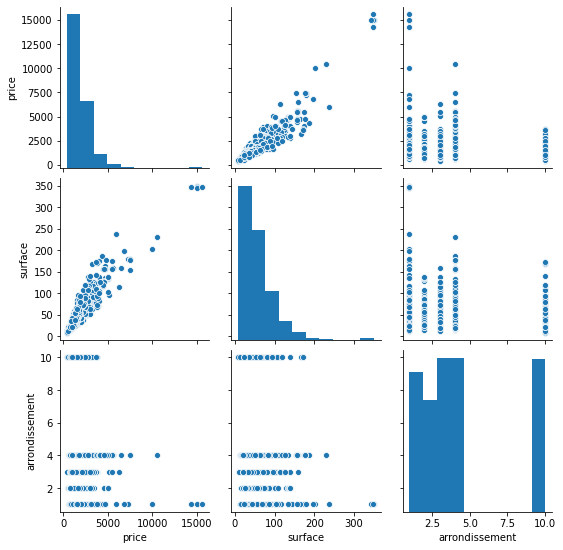

In [250]:
sns.pairplot(house_df)

In [251]:
# TODO - Observe correlations between variables

**Q4.** We are ready to apply our first **Machine Learning regression algorithm** 👊
- Thanks to `scikit-learn`, instanciate a **linear regression** and fit it to the cleaned dataset.
- Describe this Regression (and its coefficients) once trained
- Visualize results on a chart.

> 🔦 **Hint**: If you want to draw a line between 2 points `P1(x1, y1)` and `P2(x2, y2)` with matplotlib use : `plt.plot([x1, x2], [y1, y2]])`

In [252]:
X = house_df[['surface', 'arrondissement']]
y = house_df['price']

In [253]:
# TODO - Fit a Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [254]:
y_pred = lr.predict(X)

In [255]:
# TODO - Describe the regression parameters
lr.coef_, lr.intercept_

(array([ 33.62326434, -48.06119721]), 202.8091228897838)

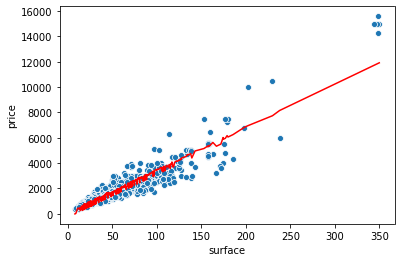

In [256]:
# TODO - Visualize results
plt.figure()

sns.scatterplot(X['surface'], y)
sns.lineplot(X['surface'], y_pred, color='red')

plt.show()

In [257]:
# TODO - Get correlation coefficient

In [258]:
lr.score(X, y)

0.8785010678053504

## We fit only with the surface as a feature

In [259]:
X_surface = np.array(house_df['surface'])

In [260]:
X_surface = X_surface.reshape(-1, 1)

In [261]:
lr_surf = LinearRegression()
lr_surf.fit(X_surface, y)

LinearRegression()

In [262]:
y_pred_surf = lr_surf.predict(X_surface)

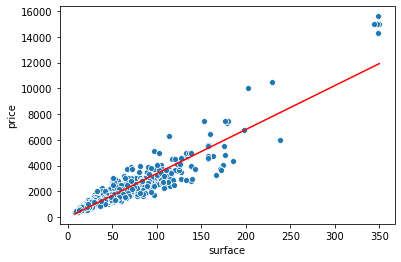

In [263]:
# TODO - Visualize results
plt.figure()

sns.scatterplot(X['surface'], y)
sns.lineplot(X['surface'], y_pred_surf, color='red')

plt.show()

In [264]:
# TODO - Get correlation coefficient

In [265]:
lr_surf.score(X_surface, y)

0.8690891148846045

**Q5.** What **score** (check in scikit-learn documentation the corresponding method) do you obtain for your linear regression? We will see later what this number corresponds to exactly 😉 

**Q6.** I have a new house, of approximately 150 squared meters and located in district 19th. What price would you give to that new property? What if this new house is located in 1th district? 🤔

In [266]:
lr.predict([[150, 10]])

array([4765.68680124])

In [267]:
lr.predict([[150, 1]])

array([5198.2375761])

In [268]:
lr_surf.predict([[150]])

array([5092.33954358])

In [269]:
# TODO - Get a new prediction

We will fit a model for each district to be as precise as possible on the result

In [270]:
house_df.arrondissement.unique()

array([ 1.,  2.,  3.,  4., 10.])

In [271]:
house_df_1 = house_df[house_df['arrondissement'] == 1]
house_df_2 = house_df[house_df['arrondissement'] == 2]
house_df_3 = house_df[house_df['arrondissement'] == 3]
house_df_4 = house_df[house_df['arrondissement'] == 4]
house_df_10 = house_df[house_df['arrondissement'] == 10]

In [272]:
X_1 = np.array(house_df_1.surface).reshape(-1, 1)
X_2 = np.array(house_df_2.surface).reshape(-1, 1)
X_3 = np.array(house_df_3.surface).reshape(-1, 1)
X_4 = np.array(house_df_4.surface).reshape(-1, 1)
X_10 = np.array(house_df_10.surface).reshape(-1, 1)

In [273]:
y_1 = house_df_1.price
y_2 = house_df_2.price
y_3 = house_df_3.price
y_4 = house_df_4.price
y_10 = house_df_10.price

In [274]:
lr_1 = LinearRegression()
lr_2 = LinearRegression()
lr_3 = LinearRegression()
lr_4 = LinearRegression()
lr_10 = LinearRegression()

In [275]:
lr_1.fit(X_1, y_1)
lr_2.fit(X_2, y_2)
lr_3.fit(X_3, y_3)
lr_4.fit(X_4, y_4)
lr_10.fit(X_10, y_10)

LinearRegression()

In [276]:
lr_10.predict([[150]])

array([3363.18280766])

In [277]:
lr_1.predict([[150]])

array([5659.85987954])

In [278]:
house_df[((house_df['surface'] < 170) & (house_df['surface'] > 130)) & ((house_df['arrondissement'] == 1) | (house_df['arrondissement'] == 10) )]

,price,surface,arrondissement
40,4001.0,138.00,1.0
44,4701.0,134.40,1.0
45,4724.0,163.00,1.0
118,3710.0,142.98,1.0
121,4714.0,134.40,1.0
139,4722.0,157.00,1.0
669,2962.0,139.38,10.0
671,3250.0,167.00,10.0


With a quick observation, it seems that we are closer to the reality when fitting a linear model for each district (price in the 10th more around 3000). Let's try to dummy the arrondissement variable to see if it can work too.

In [279]:
arr_dummies = pd.get_dummies(house_df['arrondissement'], drop_first = True)

In [282]:
house_df_dummy = pd.concat([house_df.drop('arrondissement', axis = 1), arr_dummies], axis=1)

In [291]:
X_dummies = house_df_dummy.drop('price', axis=1)

In [292]:
y_dummies = house_df_dummy.price

In [293]:
lr_dummies = LinearRegression()

In [297]:
lr_dummies.fit(X_dummies, y)

LinearRegression()

In [298]:
y_pred_dummy = lr_dummies.predict(X_dummies)

In [299]:
lr_dummies.score(X_dummies, y_dummies)

0.8799328223831558

In [302]:
lr_dummies.predict([[150, 0, 0, 0, 1]])

array([4736.16895865])

In [303]:
lr_dummies.predict([[150, 0, 0, 0, 0]])

array([5217.55913972])